# Collaborative Filtering Recommender Systems for Movies

Download data from https://grouplens.org/datasets/movielens/100k/ 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# get users
user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=user_cols, encoding='latin-1')

In [3]:
users.shape

(943, 5)

In [4]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
# get items
item_cols = ['movie_id', 'movie_title' ,'release_date','video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('ml-100k/u.item', sep='|', names=item_cols, encoding='latin-1')

In [6]:
items.shape

(1682, 24)

In [7]:
items.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


ua.base    -- The data sets ua.base, ua.test, ub.base, and ub.test
ua.test       split the u data into a training set and a test set with
ub.base       exactly 10 ratings per user in the test set.  The sets
ub.test       ua.test and ub.test are disjoint.  These data sets can
              be generated from u.data

In [8]:
# get base ratings
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_base = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')

In [9]:
ratings_base.shape

(90570, 4)

In [10]:
ratings_base.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


### Create a pivot table from the ratings_base dataset

In [11]:
rtable = pd.pivot_table(ratings_base,index='movie_id', columns='user_id', values='rating',fill_value = 0)
rtable.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5,4,0,0,0,4,0,0,0,4,...,2,3,4,0,4,0,0,5,0,0
2,3,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,5
3,4,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
4,3,0,0,0,0,0,5,0,0,4,...,5,0,0,0,0,0,2,0,0,0
5,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Y
rtable.values

array([[5, 4, 0, ..., 5, 0, 0],
       [3, 0, 0, ..., 0, 0, 5],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
R = (rtable != 0)
R = R.astype(float)
R.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


$$\sum_{i:r(i, j)=1}(\theta(j)^T x^{(i)} - y^{(i, j)} x_k^{(i)} + \lambda \theta_k^{(j)}$$


In [14]:
# user j rating (theta)
# item/movie i (X)
# Xk - for loop?

In [15]:
def cost(params, Y, R, num_users, num_movies, num_features, lambd):
    # unwrap params into X and theta
    X = params[: num_movies * num_features].reshape(num_movies, num_features)
    theta = params[num_movies * num_features:].reshape(num_users, num_features)
    
    # make prediction and compute loss
    pred =  np.dot(X, theta.T)
    loss = (pred - Y)
    # cost
    J = np.sum((np.square(loss * R))) / 2
    
    # compute cost regularization and add to original cost
    r_X =  lambd / 2 * np.sum(np.square(theta))
    r_Theta = lambd / 2 * np.sum(np.square(X))
    J = J + r_X + r_Theta
    
    return J

In [16]:
def Gradient(params, Y, R, num_users, num_movies, num_features, lambd):    
    # unwrap params into X and theta
    X = params[: num_movies * num_features].reshape(num_movies, num_features)
    theta = params[num_movies * num_features:].reshape(num_users, num_features)

    # make prediction and compute loss
    pred =  np.dot(X, theta.T)
    loss = (pred - Y)
        
    # compute gradient with regularization
    X_grad = np.dot(loss * R, theta) + lambd * X
    theta_grad = np.dot((loss * R).T, X) + lambd * Theta

    grad = np.squeeze(np.concatenate((X_grad.reshape([num_movies * num_features, 1], order = "f"),
                      theta_grad.reshape([num_users * num_features, 1], order = "f"))))

    return grad

In [17]:
def Optimize(params, Y, r, n_users, n_items, n_features, lambd, step, maxrun):
    costs = []
    for iter in range(maxrun):
        params_prime = params
        J = cost(params_prime, Y, r, n_users, n_items, n_features, lambd)
        grad = Gradient(params_prime, Y, r, n_users, n_items, n_features, lambd)
        params = params_prime - step * grad
        # append cost value on each iteration to costs list so we can plot
        costs.append(J)

    return params, costs

In [18]:
n_users = np.size(rtable, 1) # users
n_items = np.size(rtable, 0) # movies
n_features = 1 # try a small number 

# Initialization
X = np.random.normal(loc = 0.0, scale = 1.0, size = (n_items, n_features)) # i.e. n movies (items),  and 1 user (feature) 
Theta = np.random.normal(loc = 0.0, scale = 1.0, size = (n_users,n_features))

init_params = np.concatenate((X.reshape(n_items * n_features, 1, order = "F"),
                             Theta.reshape(n_users * n_features, 1, order = "F")))
init_params = np.squeeze(init_params)

# Optimization
lamba = 0.1
maxrun = 10000
step = 0.00001
params, J = Optimize(init_params, rtable.values, R.values, n_users, n_items, \
                     n_features, lamba, step, maxrun)
J[-1]

39380.64508844781

In [19]:
# now plot the cost
import matplotlib.pyplot as plt
plt.plot(J,"b.",markersize=1,label="Cost") # note: this is 0-based
plt.show()
    
# Extract X and Theta from params vector
X = params[0:(n_items * n_features)]
Theta = params[(n_items * n_features):len(params)]
X = X.reshape(n_items, n_features, order = "F")
Theta = Theta.reshape(n_users, n_features, order = "F")
pred = np.dot(X, Theta.T)

<Figure size 640x480 with 1 Axes>

In [20]:
param_X = init_params[:n_items].reshape(n_items, n_features)
print(param_X.shape)

param_theta = init_params[n_items:].reshape(n_users, n_features)
print(param_theta.shape)

(1680, 1)
(943, 1)


In [21]:
init_params[Theta.shape[0]:].shape

(1680,)

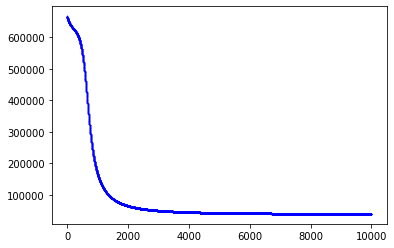

In [22]:
n_users = np.size(rtable, 1)
n_items = np.size(rtable, 0)
n_features = 1 # try a small number

# Initialization
X = np.random.normal(loc = 0.0, scale = 1.0, size = (n_items, n_features))
Theta = np.random.normal(loc = 0.0, scale = 1.0, size = (n_users,n_features))

init_params = np.concatenate((X.reshape(n_items * n_features, 1, order = "F"),
                             Theta.reshape(n_users * n_features, 1, order = "F")))
init_params = np.squeeze(init_params)

# Optimization
lamba = 0.1
maxrun = 10000
step = 0.00001
params, costs = Optimize(init_params, rtable.values, R.values, n_users, n_items, \
                     n_features, lamba, step, maxrun)
# now plot the cost
import matplotlib.pyplot as plt
plt.plot(costs,"b.",markersize=1,label="Cost") # note: this is 0-based
plt.show()
    
# Extract X and Theta from params vector
X = params[0:(n_items * n_features)]
Theta = params[(n_items * n_features):len(params)]
X = X.reshape(n_items, n_features, order = "F")
Theta = Theta.reshape(n_users, n_features, order = "F")
pred = np.dot(X, Theta.T)

In [23]:
# make a prediction
pred_df = pd.DataFrame(pred, columns = rtable.columns, index = rtable.index)
pred_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,3.981497,3.971402,3.375080,4.802457,3.440805,3.653002,4.313127,4.194550,4.185407,4.204742,...,3.852811,4.449458,4.243344,3.448089,3.965382,5.152749,3.545109,4.074217,4.355960,3.809908
2,3.361114,3.352591,2.849187,4.054154,2.904670,3.083803,3.641070,3.540969,3.533251,3.549573,...,3.252479,3.756158,3.582161,2.910820,3.347510,4.349865,2.992722,3.439386,3.677229,3.216261
3,3.179898,3.171835,2.695572,3.835573,2.748064,2.917539,3.444760,3.350057,3.342754,3.358197,...,3.077120,3.553644,3.389027,2.753882,3.167028,4.115341,2.831368,3.253951,3.478970,3.042855
4,3.646087,3.636841,3.090756,4.397886,3.150943,3.345264,3.949778,3.841191,3.832818,3.850524,...,3.528241,4.074625,3.885875,3.157614,3.631329,4.718669,3.246460,3.730995,3.989004,3.488952
5,3.368584,3.360042,2.855519,4.063164,2.911125,3.090657,3.649162,3.548839,3.541103,3.557462,...,3.259707,3.764506,3.590122,2.917289,3.354949,4.359532,2.999373,3.447030,3.685401,3.223409


In [24]:
# convert the ratings to numbers numbers 1-5
pd.options.display.float_format = '{:,.0f}'.format
pred_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,4,4,3,5,3,4,4,4,4,4,...,4,4,4,3,4,5,4,4,4,4
2,3,3,3,4,3,3,4,4,4,4,...,3,4,4,3,3,4,3,3,4,3
3,3,3,3,4,3,3,3,3,3,3,...,3,4,3,3,3,4,3,3,3,3
4,4,4,3,4,3,3,4,4,4,4,...,4,4,4,3,4,5,3,4,4,3
5,3,3,3,4,3,3,4,4,4,4,...,3,4,4,3,3,4,3,3,4,3
